In [1]:
# @title
### EP2 MAC0417 / MAC5768
################################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,               #
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO                   #
# DESTE EP.                                                                    #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM,                 #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM                        #
# DESONESTIDADE ACADÊMICA OU PLÁGIO.                                           #
#                                                                              #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS                      #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A                        #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E                      #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS                  #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP.                                         #
#                                                                              #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO                       #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR                           #
# DESONESTIDADE ACADÊMICA.                                                     #
#                                                                              #
#  Nome : Lucas Paiolla Forastiere                                             #
#  NUSP : 11221911                                                             #
#  Turma: MAC5768                                                              #
#  Prof.: Ronaldo Fumio Hashimoto                                              #
################################################################################

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extra non "data science / image processing" libraries
from pathlib import Path
from tqdm.notebook import tqdm

# Global variables
from global_variables import (
    RAW_DATA_FOLDER,
    DATA_FOLDER,
)

# We'll reduce the images from (2604, 4624) to (217, 385)
DOWNSCALE_FACTOR = 12

In [3]:
import cv2


def process_image(
    img: np.ndarray,
    *,
    downscale_factor: float | int,
) -> np.ndarray:
    img = _resize_image(img, downscale_factor)
    img = _fix_exif_rotation(img)
    img = _make_image_gray(img)
    return img


def _resize_image(img: np.ndarray, downscale_factor: float | int) -> np.ndarray:
    new_height = int(img.shape[0] / downscale_factor)
    new_width = int(img.shape[1] / downscale_factor)
    return cv2.resize(img, (new_width, new_height))


def _fix_exif_rotation(img: np.ndarray) -> np.ndarray:
    return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

def _make_image_gray(img: np.ndarray) -> np.ndarray:
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
def validate_processing(
    img: np.ndarray,
    processed_img: np.ndarray,
    *,
    downscale_factor: float | int,
) -> None:
    assert len(processed_img.shape) == 2 # Grayscale
    # Check if image was rotated and resized
    assert processed_img.shape[1] == int(img.shape[0] / downscale_factor)
    assert processed_img.shape[0] == int(img.shape[1] / downscale_factor)

In [5]:
def save_image(
    img: np.ndarray,
    filename: Path,
) -> None:
    filename.parent.mkdir(parents=True, exist_ok=True)
    plt.imsave(filename, img, cmap="gray")

In [6]:
def process_images(
    source_folder: Path,
    target_folder: Path,
    *,
    downscale_factor: float | int,
) -> None:
    for folder in tqdm(list(source_folder.iterdir())):
        for file in tqdm(list(folder.iterdir())):
            img = plt.imread(file)
            processed_img = process_image(
                img, downscale_factor=downscale_factor
            )
            validate_processing(
                img, processed_img, downscale_factor=downscale_factor
            )
            target_file = target_folder / folder.name / file.name
            save_image(processed_img, target_file)

### Test on Sample Image

In [7]:
sample_img_file = RAW_DATA_FOLDER.iterdir().__next__().iterdir().__next__()
sample_img_file

PosixPath('original_files/blue_night_outside/phone-blackkc-bluebs-d20.jpg')

Shape:  (2604, 4624, 3)


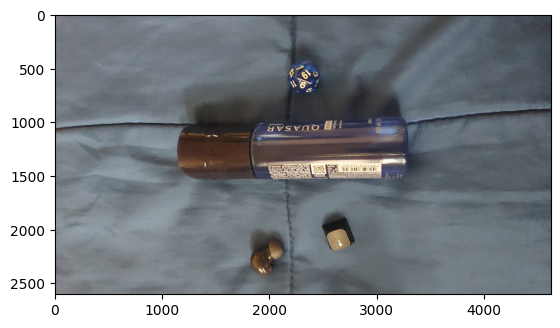

In [8]:
sample_img = plt.imread(sample_img_file)
plt.imshow(sample_img)
print("Shape: ", sample_img.shape)

Shape:  (385, 217)


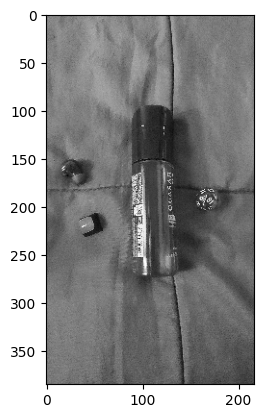

In [9]:
processed_sample_img = process_image(
    sample_img, downscale_factor=DOWNSCALE_FACTOR
)
plt.imshow(processed_sample_img, cmap="gray")
print("Shape: ", processed_sample_img.shape)

### Process all images

In [10]:
process_images(
    RAW_DATA_FOLDER,
    DATA_FOLDER,
    downscale_factor=DOWNSCALE_FACTOR,
)

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]